# NLP for self improvement posts

In [1]:
import os
import json
import pandas as pd
import numpy as np
import datetime as dt
from langdetect import detect
from cleantext import clean
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import spacy


[nltk_data] Downloading package punkt to /Users/maxwood/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Scraping Data

In [2]:
#os.system("snscrape --jsonl --max-results 10000 reddit-subreddit 'selfimprovement'> self_improvement_sm.json")

In [3]:
improvement_df = pd.read_json("self_improvement5.json", lines=True)

In [4]:
improvement_df.head(10)

,_type,author,body,created,id,parentId,subreddit,url,link,selftext,title
0,snscrape.modules.reddit.Comment,TheJahmal,Reading through this there’s a lot of focus on...,2022-05-05T06:12:04+00:00,t1_i7e87ut,t3_uipaow,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN
1,snscrape.modules.reddit.Comment,DepressedLemur9,"Come on man, you will get your time for everyt...",2022-05-05T06:03:39+00:00,t1_i7e7ji7,t1_i7auwzq,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN
2,snscrape.modules.reddit.Comment,CertifiedShotta,Lol sure who this,2022-05-05T05:58:42+00:00,t1_i7e74ra,t1_i7e6rek,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN
3,snscrape.modules.reddit.Comment,SixtyMetreMud,"its strange, I feel like up until about 23-24 ...",2022-05-05T05:54:52+00:00,t1_i7e6tjv,t1_i7bmky6,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN
4,snscrape.modules.reddit.Comment,Rubenisms,Cooking\nBudgeting,2022-05-05T05:54:23+00:00,t1_i7e6s5k,t3_uih03s,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN
5,snscrape.modules.reddit.Comment,Zubbo64,I know you IRL! Lol,2022-05-05T05:54:07+00:00,t1_i7e6rek,t3_uiq1cl,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN
6,snscrape.modules.reddit.Submission,throwaway3c3,NaN,2022-05-05T05:49:41+00:00,t3_uiqlj3,NaN,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,None,Self parenting is something I've learned a bit...,Improving but still hurting
7,snscrape.modules.reddit.Comment,Thin_Ad_4763,Totally!!!!!,2022-05-05T05:47:50+00:00,t1_i7e68eg,t1_i70yglx,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN
8,snscrape.modules.reddit.Comment,Zubbo64,Move back to a city no matter the consequences...,2022-05-05T05:46:24+00:00,t1_i7e63zx,t3_uiqcne,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN
9,snscrape.modules.reddit.Comment,noresellcrew,Wait so you’re trying to say you are this way ...,2022-05-05T05:41:35+00:00,t1_i7e5p8r,t3_uipaow,selfimprovement,https://old.reddit.com/r/selfimprovement/comme...,NaN,NaN,NaN


#### Example of what a title and a post look like

In [5]:
improvement_df.loc[6].title

'Improving but still hurting'

In [6]:
improvement_df.loc[6].selftext

"Self parenting is something I've learned a bit about recently, creating dialogues within yourself, between your inner child and adult self to correct unacceptable behavior from your reactive self. I've had the opportunity to actually improve for some time now and it's been slow. I believe I need to be patient with myself but, life hurts a lot. I don't know how to cope with what I feel, I do attend therapy btw. There is room for improvement in my routine and that's about all I recognize that's you know, in my power to change. I have friends, I have family but I don't know how to communicate my current state, otherwise I'm performing normalcy. I feel like I could only improve my life, and my character, not much makes me feel.. good though, and that's probably from a shattered self image and rough upbringing. I want to skip to the part where I know how to help myself better and all I'm landing on is patience and consistency, the present, although I'm in it, hurts a ton."

In [7]:
# Making the created column a datetime object
improvement_df['date_time'] = improvement_df.created.apply(lambda x: dt.datetime.fromisoformat(x))
improvement_df['year'] = improvement_df.date_time.apply(lambda x: x.year)
improvement_df['month'] = improvement_df.date_time.apply(lambda x: x.month)

In [8]:
# splitting dataframe into comment and post dataframes
comment_df = improvement_df[improvement_df['_type'] == 'snscrape.modules.reddit.Comment']
comment_df = comment_df.drop(columns = ['link','selftext','title'])
comment_df = comment_df.dropna()

## Cleaning Comments

In [9]:
# Generally removing not useful comments
comment_df = comment_df[comment_df['body']!='[deleted]']
comment_df = comment_df[comment_df['body']!='[removed]']
comment_df = comment_df[comment_df.body != 'None']
comment_df = comment_df[comment_df.body != '']
comment_df = comment_df[comment_df.body != ' ']
comment_df = comment_df[comment_df.author != 'AutoModerator']

comment_df['is_digit'] = comment_df.body.apply(lambda x: x.isdigit())
comment_df = comment_df[comment_df.is_digit != True]

In [10]:
# removing some columns I don't need to clean things up 
comment_df = comment_df.drop(columns = ['subreddit','created','is_digit','_type'])

In [11]:
# chaniging everything to lowercase, removing punctuation, and removing emoji's, ect.
comment_df['cleaned_body'] = comment_df.body.apply(lambda x: clean(x,
                                                                   lang = 'eng',
                                                                   no_emoji = True,
                                                                   no_line_breaks = True,
                                                                   no_urls = True,
                                                                   no_emails = True,
                                                                   no_phone_numbers = True,
                                                                   no_currency_symbols = True,
                                                                   no_punct = True))

In [12]:
comment_df['tokenized_body'] = comment_df.cleaned_body.apply(lambda x: word_tokenize(x))

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw_nltk1 = stopwords.words('english')
sw_nltk = word_tokenize(clean(sw_nltk1,no_punct = True))
sw_nltk.append('ill')
sw_nltk.append('ive')
sw_nltk.append('id')
sw_nltk.append('im')

#consider_removing = ['like','feel','goal','think',
#                     'life','feel','improve','selfimprovement',
#                     'thing','want','make','would','get']
#sw_nltk = sw_nltk+consider_removing 


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maxwood/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
comment_df['sw_removed_body'] = comment_df.tokenized_body.apply(lambda l1: [x for x in l1 if x not in sw_nltk])

In [15]:
comment_df.sample(5)

,author,body,id,parentId,url,date_time,year,month,cleaned_body,tokenized_body,sw_removed_body
57043,Subject_314159,Generic approach to apply on almost everything...,t1_hwddid3,t3_sp0616,https://old.reddit.com/r/selfimprovement/comme...,2022-02-10 14:40:14+00:00,2022,2,generic approach to apply on almost everything...,"[generic, approach, to, apply, on, almost, eve...","[generic, approach, apply, almost, everything,..."
98312,1stJune2021,Love this analogy so much!,t1_hpnpta1,t1_hpasgp0,https://old.reddit.com/r/selfimprovement/comme...,2021-12-23 07:34:47+00:00,2021,12,love this analogy so much,"[love, this, analogy, so, much]","[love, analogy, much]"
132382,stillyou1122,That's why being kind to online strangers is a...,t1_hjwk2bx,t1_hjviepq,https://old.reddit.com/r/selfimprovement/comme...,2021-11-09 05:40:59+00:00,2021,11,thats why being kind to online strangers is a ...,"[thats, why, being, kind, to, online, stranger...","[thats, kind, online, strangers, necessity, kn..."
635280,unigami,You have to have some kind of reward system bu...,t1_e3grz3l,t3_93xw38,https://old.reddit.com/r/selfimprovement/comme...,2018-08-02 10:36:36+00:00,2018,8,you have to have some kind of reward system bu...,"[you, have, to, have, some, kind, of, reward, ...","[kind, reward, system, built, even, simple, ma..."
559414,momosem,"Do something you're not used to, like drawing,...",t1_emufaye,t3_bm39ld,https://old.reddit.com/r/selfimprovement/comme...,2019-05-08 16:55:32+00:00,2019,5,do something youre not used to like drawing bo...,"[do, something, youre, not, used, to, like, dr...","[something, used, like, drawing, bowling, brea..."


In [16]:
comment_df.iloc[14].body

'Reading this made me calm down. My heart was pounding fast and heavy before that. Thank you so much! Sending you positive vibes 💐'

In [17]:
comment_df.iloc[14].cleaned_body

'reading this made me calm down my heart was pounding fast and heavy before that thank you so much sending you positive vibes'

## Cleaning Posts

In [18]:
post_df = improvement_df[improvement_df['_type'] == 'snscrape.modules.reddit.Submission']
print(len(post_df))
post_df = post_df.drop(columns = ['link','body','parentId','_type','subreddit'])
post_df = post_df.dropna()

94752


In [19]:
# Generally removing not useful posts
post_df = post_df[post_df['selftext']!='[deleted]']
post_df = post_df[post_df['selftext']!='[removed]']
post_df = post_df[post_df.selftext != 'None']
post_df = post_df[post_df.selftext != '']
post_df = post_df[post_df.selftext != ' ']

post_df['is_digit'] = post_df.selftext.apply(lambda x: x.isdigit())
post_df = post_df[post_df.is_digit != True]

In [20]:
# chaniging everything to lowercase, removing punctuation, and removing emoji's, ect.
post_df['cleaned_title'] = post_df.title.apply(lambda x: clean(x,
                                                                   lang = 'eng',
                                                                   no_emoji = True,
                                                                   no_line_breaks = True,
                                                                   no_urls = True,
                                                                   no_emails = True,
                                                                   no_phone_numbers = True,
                                                                   no_currency_symbols = True,
                                                                   no_punct = True))

In [21]:
# chaniging everything to lowercase, removing punctuation, and removing emoji's, ect.
post_df['cleaned_selftext'] = post_df.selftext.apply(lambda x: clean(x,
                                                                   lang = 'eng',
                                                                   no_emoji = True,
                                                                   no_line_breaks = True,
                                                                   no_urls = True,
                                                                   no_emails = True,
                                                                   no_phone_numbers = True,
                                                                   no_currency_symbols = True,
                                                                   no_punct = True))

In [22]:
post_df['tokenized_title'] = post_df.cleaned_title.apply(lambda x: word_tokenize(x))

In [23]:
post_df['tokenized_selftext'] = post_df.cleaned_selftext.apply(lambda x: word_tokenize(x))

In [24]:
post_df['sw_removed_title'] = post_df.tokenized_title.apply(lambda l1: [x for x in l1 if x not in sw_nltk])

In [25]:
post_df['sw_removed_selftext'] = post_df.tokenized_selftext.apply(lambda l1: [x for x in l1 if x not in sw_nltk])

In [26]:
## Tagging part of speech now
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/maxwood/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [27]:
post_df['tagged_title'] = post_df.sw_removed_title.apply(lambda x: pos_tag(x))

In [29]:
post_df['tagged_selftext'] = post_df.sw_removed_selftext.apply(lambda x: pos_tag(x))

In [30]:
from nltk.corpus import wordnet
def get_wordnet_pos(tags):
    pos_list = []
    for tag in tags:
        if tag[1].startswith('J'):
            pos_list.append(wordnet.ADJ)
        elif tag[1].startswith('V'):
            pos_list.append(wordnet.VERB)
        elif tag[1].startswith('N'):
            pos_list.append(wordnet.NOUN)
        elif tag[1].startswith('R'):
            pos_list.append(wordnet.ADV)
        else:
            pos_list.append('n')
    return(np.array(pos_list))


In [31]:
post_df['pos_title'] = post_df.tagged_title.apply(lambda x: get_wordnet_pos(x))

In [32]:
post_df['pos_selftext'] = post_df.tagged_selftext.apply(lambda x: get_wordnet_pos(x))

In [33]:
post_df['reshaped_selftext'] = post_df.pos_selftext.apply(lambda x: np.reshape(x,(len(x),1)))

In [34]:
post_df['reshaped_title'] = post_df.pos_title.apply(lambda x: np.reshape(x,(len(x),1)))

In [35]:
post_df['array_selftext'] = post_df.tagged_selftext.apply(lambda x: np.array(x))

In [36]:
post_df['array_title'] = post_df.tagged_title.apply(lambda x: np.array(x))

In [37]:
post_df['len_selftext'] = post_df.array_selftext.apply(lambda x: len(x))

In [38]:
post_df['len_title'] = post_df.array_title.apply(lambda x: len(x))

In [39]:
post_df = post_df.drop(post_df[post_df.len_selftext == 0].index)

In [40]:
post_df = post_df.drop(post_df[post_df.len_title == 0].index)

In [41]:
post_df['combined_selftext'] = post_df.apply(lambda x: np.append(x['array_selftext'],x['reshaped_selftext'],axis = 1), axis = 1)

In [42]:
post_df['combined_title'] = post_df.apply(lambda x: np.append(x['array_title'],x['reshaped_title'],axis = 1), axis = 1)

In [65]:
type(post_df.combined_selftext.iloc[0])

numpy.ndarray

In [71]:
post_df['noun_selftext'] = post_df.combined_selftext.apply(lambda x: [y for y in x if y[1].startswith('N')])

In [72]:
post_df['adj_selftext'] = post_df.combined_selftext.apply(lambda x: [y for y in x if y[1].startswith('J')])

In [73]:
post_df['verb_selftext'] = post_df.combined_selftext.apply(lambda x: [y for y in x if y[1].startswith('V')])

In [74]:
post_df['adv_selftext'] = post_df.combined_selftext.apply(lambda x: [y for y in x if y[1].startswith('R')])

In [75]:
post_df['noun_title'] = post_df.combined_title.apply(lambda x: [y for y in x if y[1].startswith('N')])

In [76]:
post_df['adj_title'] = post_df.combined_title.apply(lambda x: [y for y in x if y[1].startswith('J')])

In [77]:
post_df['verb_title'] = post_df.combined_title.apply(lambda x: [y for y in x if y[1].startswith('V')])

In [78]:
post_df['adv_title'] = post_df.combined_title.apply(lambda x: [y for y in x if y[1].startswith('R')])

In [79]:
wnl = nltk.stem.WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')
  
def lemmatize(s):
     s = [wnl.lemmatize(word[0], pos = word[2]) for word in s]
     return(s)




[nltk_data] Downloading package wordnet to /Users/maxwood/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/maxwood/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [44]:
post_df['lem_title'] = post_df.combined_title.apply(lambda x: lemmatize(x))

In [45]:
post_df['lem_selftext'] = post_df.combined_selftext.apply(lambda x: lemmatize(x))

In [81]:
post_df['lem_title_noun'] = post_df.noun_title.apply(lambda x: lemmatize(x))

In [82]:
post_df['lem_title_verb'] = post_df.verb_title.apply(lambda x: lemmatize(x))

In [83]:
post_df['lem_title_adj'] = post_df.adj_title.apply(lambda x: lemmatize(x))

In [84]:
post_df['lem_title_adv'] = post_df.adv_title.apply(lambda x: lemmatize(x))

In [85]:
post_df['lem_selftext_noun'] = post_df.noun_selftext.apply(lambda x: lemmatize(x))

In [87]:
post_df['lem_selftext_verb'] = post_df.verb_selftext.apply(lambda x: lemmatize(x))

In [88]:
post_df['lem_selftext_adj'] = post_df.adj_selftext.apply(lambda x: lemmatize(x))

In [89]:
post_df['lem_selftext_adv'] = post_df.adv_selftext.apply(lambda x: lemmatize(x))

In [46]:
post_df['title_together'] = post_df.lem_title.apply(lambda x: ' '.join(x))

In [47]:
post_df['selftext_together'] = post_df.lem_selftext.apply(lambda x: ' '.join(x))

In [91]:
post_df['title_together_noun'] = post_df.lem_title_noun.apply(lambda x: ' '.join(x))

In [92]:
post_df['title_together_verb'] = post_df.lem_title_verb.apply(lambda x: ' '.join(x))

In [93]:
post_df['title_together_adj'] = post_df.lem_title_adj.apply(lambda x: ' '.join(x))

In [94]:
post_df['title_together_adv'] = post_df.lem_title_adv.apply(lambda x: ' '.join(x))

In [95]:
post_df['selftext_together_noun'] = post_df.lem_selftext_noun.apply(lambda x: ' '.join(x))

In [96]:
post_df['selftext_together_verb'] = post_df.lem_selftext_verb.apply(lambda x: ' '.join(x))

In [97]:
post_df['selftext_together_adj'] = post_df.lem_selftext_adj.apply(lambda x: ' '.join(x))

In [98]:
post_df['selftext_together_adv'] = post_df.lem_selftext_adv.apply(lambda x: ' '.join(x))

In [ ]:
#post_df = post_df.drop(columns = [ 'is_digit', 'tagged_title',
#       'tagged_selftext', 'pos_title', 'pos_selftext', 'reshaped_selftext',
#       'reshaped_title', 'array_selftext', 'array_title', 'len_selftext',
#       'len_title'])

In [99]:
post_df['title_selftext'] = post_df.apply(lambda x: x['title_together']+' '+x['selftext_together'],axis = 1)

In [100]:
post_df['nouns'] = post_df.apply(lambda x: x['title_together_noun']+' '+x['selftext_together_noun'],axis = 1)

In [101]:
post_df['verbs'] = post_df.apply(lambda x: x['title_together_verb']+' '+x['selftext_together_verb'],axis = 1)

In [103]:
post_df['adjs'] = post_df.apply(lambda x: x['title_together_adj']+' '+x['selftext_together_adj'],axis = 1)

In [104]:
post_df['advs'] = post_df.apply(lambda x: x['title_together_adv']+' '+x['selftext_together_adv'],axis = 1)

In [350]:
post_df['nouns_verbs'] = post_df.apply(lambda x: x['nouns']+' '+x['verbs'],axis = 1)

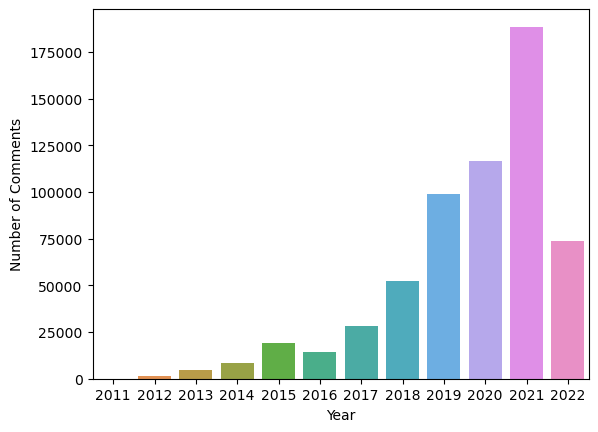

In [105]:
import seaborn as sns
ax = sns.countplot(x = 'year', data = comment_df)
ax.set_ylabel('Number of Comments')
ax.set_xlabel('Year')
plt.show()

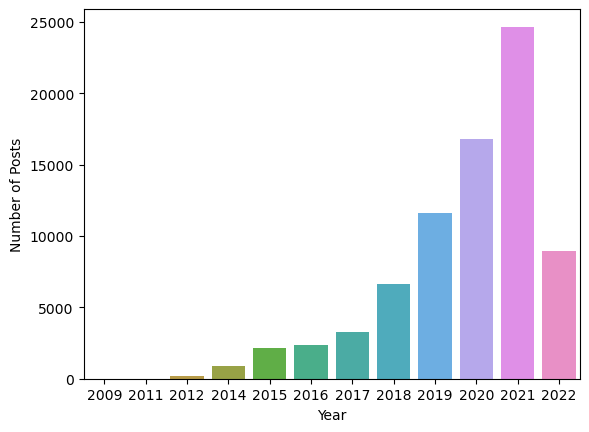

In [106]:
import seaborn as sns
ax = sns.countplot(x = 'year', data = post_df)
ax.set_ylabel('Number of Posts')
ax.set_xlabel('Year')
plt.show()

In [107]:
post_df

,author,created,id,url,selftext,title,date_time,year,month,is_digit,...,title_together_adv,selftext_together_noun,selftext_together_verb,selftext_together_adj,selftext_together_adv,title_selftext,nouns,verbs,adjs,advs
6,throwaway3c3,2022-05-05T05:49:41+00:00,t3_uiqlj3,https://old.reddit.com/r/selfimprovement/comme...,Self parenting is something I've learned a bit...,Improving but still hurting,2022-05-05 05:49:41+00:00,2022,5,False,...,still,self something bit dialogue adult self self op...,parent create correct improve believe hurt kno...,learned inner child unacceptable behavior reac...,recently actually otherwise probably well,improve still hurt self parent something learn...,self something bit dialogue adult self self o...,improve hurt parent create correct improve bel...,learned inner child unacceptable behavior rea...,still recently actually otherwise probably well
18,Efficient-Charity-72,2022-05-05T05:33:30+00:00,t3_uiqcne,https://old.reddit.com/r/selfimprovement/comme...,I'll try and make it short:\n\nI moved into an...,"Im 24 and i can't get out of my comfort zone, ...",2022-05-05 05:33:30+00:00,2022,5,False,...,maybe,city year get dream job year time music produc...,try make move work leave lonley use connect lo...,short able hard last full small big hard littl...,ago still still really even always always also...,24 cant get comfort zone maybe someone experie...,get comfort zone someone help city year get dr...,experience try make move work leave lonley use...,cant short able hard last full small big hard ...,maybe ago still still really even always alway...
20,CertifiedShotta,2022-05-05T05:13:46+00:00,t3_uiq1cl,https://old.reddit.com/r/selfimprovement/comme...,First I want to lose weight. I'm 15 and am 265...,my self improvement goals!,2022-05-05 05:13:46+00:00,2022,5,False,...,,weight pound day week work eat drink pound por...,want go ruin want go want wan row go,lose tall gym diet next stop confident,first horribly maybe na fap,self improvement goal first want lose weight 1...,self improvement goal weight pound day week wo...,want go ruin want go want wan row go,lose tall gym diet next stop confident,first horribly maybe na fap
41,silkysugarshower,2022-05-05T04:04:28+00:00,t3_uiox32,https://old.reddit.com/r/selfimprovement/comme...,Hi reddit. I'm sick with covid rn and I've sel...,I have too many aspirations and I'm overthinki...,2022-05-05 04:04:28+00:00,2022,5,False,...,,hi reddit covid rn self lot test get foot pass...,reflect try try write wan feel make dance make...,sick reinvent negative na stuck martial cant t...,back obviously even,many aspiration overthinking overwhelm hi redd...,aspiration hi reddit covid rn self lot test ge...,overthinking overwhelm reflect try try write w...,many sick reinvent negative na stuck martial c...,back obviously even
47,Alive-Doughnut2345,2022-05-05T03:46:20+00:00,t3_uiol3k,https://old.reddit.com/r/selfimprovement/comme...,I want desperately to put in some more work bu...,How do I work towards goals after work when I’...,2022-05-05 03:46:20+00:00,2022,5,False,...,,work,want put drain,,desperately,work towards goal work demotivated drained tir...,work towards goal sometimes work,work demotivated stress want put drain,drained tired,desperately
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764949,[deleted],2011-05-25T22:27:18+00:00,t3_hk5r2,https://old.reddit.com/r/selfimprovement/comme...,I had an appointment today with the dentist. O...,What cures absentmindedness?,2011-05-25 22:27:18+00:00,2011,5,False,...,,appointment today dentist week email reminder ...,get call mark go > make happen,last reminder forgot < sure,still completely never,cure absentmindedness appointment today dentis...,cure appointment today dentist week email remi...,absentmindedness get call mark go > make happen,last reminder forgot < sure,still completely never
765029,mike-l,2009-11-11T07:05:38+00:00,t3_a35f5,https://old.reddit.com/r/selfimprovement/comme...,Trail

In [284]:
#post_df.to_pickle("./posts_df.pkl")

In [ ]:
#post_df = pd.read_pickle("./posts_df.pkl")  

# Begin Modeling Section

## LSA model

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

docs = post_df.title_selftext
#vec = CountVectorizer(min_df = .05)
vec = TfidfVectorizer(min_df = .05)
doc_term = vec.fit_transform(docs)

In [138]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(5)
lsa.fit(doc_term)

TruncatedSVD(n_components=5)

In [139]:
terms = list(vec.vocabulary_.keys())

In [140]:
def get_top_terms(topic_index, n_terms, model=lsa, terms=terms):
    
    # get the topic components (i.e., term weights)
    H = model.components_
    H[topic_index]
    
    # get term indices, sorted (descending) by topic weights
    indices = np.argsort(H[topic_index])[::-1][:n_terms]
    
    # use the `terms` array to get the actual top terms
    topics = []
    for i in indices:
        topics.append(terms[i])
    
    return (topics)

In [143]:
get_top_terms(2,10)

['part',
 'college',
 'interest',
 'past',
 'would',
 'head',
 'health',
 'person',
 'guy',
 'begin']

## LSA nouns

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

docs = post_df.nouns
vec = CountVectorizer(min_df = .05)
#vec = TfidfVectorizer(min_df = .05)
doc_term = vec.fit_transform(docs)

In [145]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(5)
lsa.fit(doc_term)

TruncatedSVD(n_components=5)

In [146]:
terms = list(vec.vocabulary_.keys())

In [147]:
def get_top_terms(topic_index, n_terms, model=lsa, terms=terms):
    
    # get the topic components (i.e., term weights)
    H = model.components_
    H[topic_index]
    
    # get term indices, sorted (descending) by topic weights
    indices = np.argsort(H[topic_index])[::-1][:n_terms]
    
    # use the `terms` array to get the actual top terms
    topics = []
    for i in indices:
        topics.append(terms[i])
    
    return (topics)

In [151]:
get_top_terms(3,10)

['get',
 'class',
 'person',
 'goal',
 'guy',
 'please',
 'try',
 'health',
 'lot',
 'month']

## NMF model

In [152]:
remove = ['na','url','improve']

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

docs = post_df.title_selftext
#vec = CountVectorizer(min_df = .05, max_df = .9)
vec = TfidfVectorizer(min_df = .05, max_df = .9, stop_words = remove)
doc_term = vec.fit_transform(docs)

In [154]:
terms = list(vec.vocabulary_.keys())

In [155]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=25)
doc_topic = nmf.fit_transform(doc_term)

/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/Users/maxwood/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [158]:
def get_top_terms(topic_index, n_terms, model=nmf, terms=terms):
    
    # get the topic components (i.e., term weights)
    H = model.components_
    H[topic_index]
    
    # get term indices, sorted (descending) by topic weights
    indices = np.argsort(H[topic_index])[::-1][:n_terms]
    
    # use the `terms` array to get the actual top terms
    topics = []
    for i in indices:
        topics.append(terms[i])
    
    return (topics)

In [286]:
get_top_terms(4,10)

['get',
 'hour',
 'anyone',
 'body',
 'thought',
 'end',
 'post',
 'life',
 'anxiety',
 'point']

## NMF nouns

In [457]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

docs = post_df.nouns_verbs
#vec = CountVectorizer(min_df = .05, max_df = .9)
vec = TfidfVectorizer(min_df = .05, max_df = .9)
doc_term = vec.fit_transform(docs)

In [458]:
terms = list(vec.vocabulary_.keys())

In [459]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2)
doc_topic = nmf.fit_transform(doc_term)

In [460]:
def get_top_terms(topic_index, n_terms, model=nmf, terms=terms):
    
    # get the topic components (i.e., term weights)
    H = model.components_
    H[topic_index]
    
    # get term indices, sorted (descending) by topic weights
    indices = np.argsort(H[topic_index])[::-1][:n_terms]
    
    # use the `terms` array to get the actual top terms
    topics = []
    for i in indices:
        topics.append(terms[i])
    
    return (topics)

In [464]:
get_top_terms(0,10)

['think',
 'idea',
 'year',
 'week',
 'share',
 'person',
 'show',
 'others',
 'moment',
 'book']

In [ ]:
nmf

## LDA model

In [410]:
consider_removing = ['like','feel','goal','think',
                     'life','improve','selfimprovement',
                     'thing','want','make','would','get',
                     'become','improvement','good','na',
                     'need','change','find','something',
                     'even','people','go','url']

In [540]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models, matutils



docs = post_df.title_selftext


#vectorizer = CountVectorizer(stop_words = consider_removing)
#vectorizer = CountVectorizer(min_df = .05, max_df = .95)
vectorizer = TfidfVectorizer(min_df = .05, max_df = .60, stop_words = consider_removing)

term_doc_matrix = vectorizer.fit_transform(docs).transpose()

NameError: name 'simple_preprocess' is not defined

In [478]:
corpus = matutils.Sparse2Corpus(term_doc_matrix)
id2word = dict((v,k) for k, v in vectorizer.vocabulary_.items())
lda = models.LdaModel(corpus = corpus, num_topics = 10, id2word = id2word, random_state = 21)

In [479]:
topics = lda.print_topics()

In [480]:
topics[0]

(0,
 '0.029*"help" + 0.023*"tip" + 0.020*"advice" + 0.019*"anyone" + 0.017*"guy" + 0.016*"really" + 0.016*"thanks" + 0.016*"study" + 0.016*"know" + 0.013*"work"')

In [481]:
topics[1]

(1,
 '0.024*"girl" + 0.020*"talk" + 0.017*"know" + 0.017*"say" + 0.015*"fuck" + 0.014*"really" + 0.014*"friend" + 0.013*"hate" + 0.013*"guy" + 0.012*"tell"')

In [482]:
topics[2]

(2,
 '0.030*"self" + 0.024*"confidence" + 0.017*"look" + 0.014*"know" + 0.012*"word" + 0.012*"really" + 0.012*"way" + 0.011*"problem" + 0.011*"say" + 0.011*"help"')

In [483]:
topics[3]

(3,
 '0.023*"job" + 0.020*"year" + 0.019*"work" + 0.016*"school" + 0.014*"time" + 0.013*"college" + 0.011*"know" + 0.011*"start" + 0.010*"really" + 0.010*"month"')

In [484]:
topics[4]

(4,
 '0.030*"game" + 0.024*"video" + 0.023*"play" + 0.021*"time" + 0.015*"watch" + 0.013*"work" + 0.012*"know" + 0.011*"really" + 0.011*"day" + 0.011*"anything"')

In [485]:
topics[5]

(5,
 '0.013*"one" + 0.013*"thought" + 0.013*"mind" + 0.013*"time" + 0.012*"take" + 0.012*"fear" + 0.011*"way" + 0.011*"positive" + 0.011*"negative" + 0.010*"know"')

In [486]:
topics[6]

(6,
 '0.026*"learn" + 0.019*"skill" + 0.016*"new" + 0.014*"personal" + 0.013*"time" + 0.012*"one" + 0.012*"work" + 0.012*"course" + 0.011*"share" + 0.011*"free"')

In [487]:
topics[7]

(7,
 '0.019*"person" + 0.017*"love" + 0.017*"know" + 0.015*"others" + 0.015*"someone" + 0.013*"stop" + 0.013*"relationship" + 0.012*"way" + 0.012*"really" + 0.012*"say"')

In [488]:
topics[8]

(8,
 '0.030*"book" + 0.027*"day" + 0.022*"habit" + 0.022*"read" + 0.017*"time" + 0.015*"work" + 0.015*"sleep" + 0.014*"eat" + 0.014*"start" + 0.012*"wake"')

## LDA nouns

In [385]:
consider_removing = ['like','feel','goal','think',
                     'life','improve','selfimprovement',
                     'thing','want','make','would','get',
                     'become','improvement','good','na',
                     'need','change','find','something',
                     'even','people','go','url']

In [589]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models, matutils
from gensim.utils import simple_preprocess

docs = post_df.nouns
doc_tokenized = [simple_preprocess(doc) for doc in docs]
dictionary = corpora.Dictionary()
bow = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]

#vectorizer = CountVectorizer(stop_words = consider_removing)
#vectorizer = CountVectorizer(min_df = .05, max_df = .95)
vectorizer = TfidfVectorizer(min_df = .05, max_df = .95, stop_words = consider_removing)

term_doc_matrix = vectorizer.fit_transform(docs).transpose()

In [591]:
len(bow)

77615

In [544]:
corpus = matutils.Sparse2Corpus(term_doc_matrix)
id2word = dict((v,k) for k, v in vectorizer.vocabulary_.items())
lda = models.LdaModel(corpus = corpus, num_topics = 10, id2word = id2word, random_state = 31)
#10 seems to make some sense

In [617]:
topics = lda.print_topics(num_words = 10)

In [618]:
topics[0]

(0,
 '0.077*"school" + 0.063*"college" + 0.059*"year" + 0.050*"class" + 0.046*"habit" + 0.043*"motivation" + 0.040*"time" + 0.025*"work" + 0.023*"anything" + 0.022*"job"')

In [619]:
topics[1]

(1,
 '0.067*"anxiety" + 0.052*"depression" + 0.041*"hate" + 0.035*"year" + 0.032*"time" + 0.030*"everything" + 0.025*"word" + 0.025*"help" + 0.025*"cant" + 0.024*"health"')

In [620]:
topics[2]

(2,
 '0.094*"job" + 0.061*"work" + 0.057*"money" + 0.041*"time" + 0.039*"year" + 0.025*"home" + 0.025*"anything" + 0.024*"month" + 0.022*"start" + 0.022*"stuff"')

In [621]:
topics[3]

(3,
 '0.104*"friend" + 0.042*"family" + 0.040*"year" + 0.038*"time" + 0.036*"parent" + 0.027*"school" + 0.024*"care" + 0.023*"person" + 0.021*"relationship" + 0.021*"way"')

In [622]:
topics[4]

(4,
 '0.056*"girl" + 0.048*"someone" + 0.047*"person" + 0.046*"talk" + 0.045*"confidence" + 0.034*"friend" + 0.029*"time" + 0.027*"guy" + 0.025*"problem" + 0.024*"way"')

In [623]:
topics[5]

(5,
 '0.145*"book" + 0.060*"guy" + 0.055*"help" + 0.052*"anyone" + 0.050*"thanks" + 0.043*"question" + 0.042*"tip" + 0.041*"advice" + 0.036*"idea" + 0.029*"time"')

In [616]:
topics[6]

(6,
 '0.052*"others" + 0.050*"way" + 0.042*"thought" + 0.039*"mind" + 0.035*"time"')

In [553]:
topics[7]

(7,
 '0.057*"game" + 0.050*"stop" + 0.048*"time" + 0.035*"course" + 0.035*"moment" + 0.033*"use" + 0.029*"way" + 0.026*"problem" + 0.024*"experience" + 0.023*"day"')

In [554]:
topics[8]

(8,
 '0.117*"day" + 0.075*"time" + 0.063*"week" + 0.062*"hour" + 0.038*"today" + 0.037*"work" + 0.037*"month" + 0.030*"night" + 0.027*"year" + 0.023*"habit"')

In [555]:
topics[9]

(9,
 '0.071*"self" + 0.070*"relationship" + 0.055*"skill" + 0.051*"step" + 0.044*"love" + 0.035*"focus" + 0.034*"time" + 0.033*"share" + 0.026*"way" + 0.024*"person"')

In [ ]:
doc_tops = lda.get_document_topics(bow)

In [510]:
lda.get_topic_terms(0)

[(28, 0.12920019),
 (47, 0.07432535),
 (34, 0.0553261),
 (13, 0.048454043),
 (79, 0.04535055),
 (69, 0.04204378),
 (89, 0.029428937),
 (87, 0.022748131),
 (84, 0.022398172),
 (14, 0.021832302)]

In [ ]:
topics[9]

In [ ]:
# Think about a logistic regression model for pre and post pandemic posts
# Try just nouns, or adverbs, or something